# Metoda najmniejszych kwadratów

Opisane jest tu rozwiazywanie jej dla równań postaci:

$$g(x) = c_1 + c_0 x$$

oraz

$$g(x) = a^x * b$$

Dla obu przypadków metoda jest prawie identyczna, rozwiązujemy w pierwszym przypadku równanie


$\begin{align} 
(n-1)a_0 + \bigg{(} \sum_{i=0}^n x_i \bigg{)}a_1 & =  \sum_{i=0}^n f_i \\
\bigg{(}\sum_{i=0}^n x_i\bigg{)}a_0 + \bigg{(}\sum_{i=0}^n x_i^2\bigg{)}a_1 & =  \sum_{i=0}^n f_i x_i 
\end{align}$


A w drugim


$\begin{align} 
(n-1)a_0 + \big{(}\sum_{i=0}^n x_i\big{)}a_1 &=  \sum_{i=0}^n log(f_i) \\ 
\bigg{(}\sum_{i=0}^n x_i\bigg{)}a_0 + \bigg{(}\sum_{i=0}^n x_i^2\bigg{)}a_1 &=  \sum_{i=0}^n log(f_i) x_i 
\end{align}$


Najlepiej policzyć na boku sumy a potem podstawić do macierzy i rozwiązać metodą wyznaczników.

[[  4.   6.  46.]
 [  6.  14. 124.]]

g(x) = 11.0x + -5.0


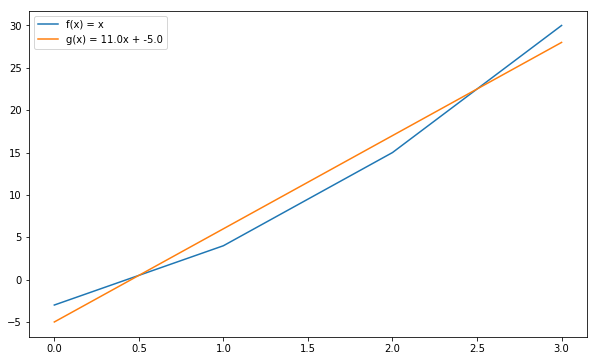

In [13]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]


def cwiczenie2():
    x = np.array([0,1,2,3],dtype="float32")
    y = np.array([-3,4,15,30],dtype="float32")


    sum_x = np.sum(x)
    n = len(x)
    sum_f = np.sum(y)
    sum_x2 = np.sum(x*x)
    sum_fx = np.sum(x*y)

    # tworzymy macierz

    A = np.array([
        [n,sum_x,sum_f],
        [sum_x,sum_x2,sum_fx]
    ])

    print(A)

    
    W = linalg.det(A[:, :-1]) # det glowny

    W1 = linalg.det(A[:, [0,2]]) 

    W2 = linalg.det(A[:, [2,1]]) 


 
    a0 = W1/W
    a1 = W2/W
    
    
    print(f'\ng(x) = {a0}x + {a1}')
    func = lambda x: a0*x + a1 # nasza nowa funkcja
    y1 = [func(x1) for x1 in x]
    
    plt.plot(x,y)
    plt.plot(x,y1)
    plt.legend(['f(x) = x', f'g(x) = {a0}x + {a1}'], loc='upper left')
    plt.show()
    
cwiczenie2()

[0.         1.94591015 1.09861229]
[[  3.          17.           3.04452244]
 [ 17.         115.          19.61706134]]

g(x) = 1.345768 * 1.135058**x


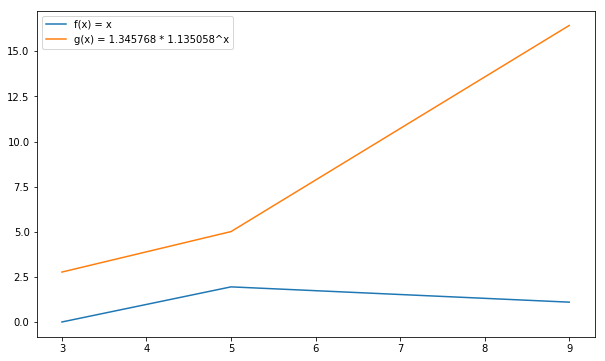

In [15]:
def cwiczenie4():
    x = np.array([3,5,9])
    y = np.array([1,7,3])
    y = np.log(y)
    print(y)
    sum_x = np.sum(x)
    n = len(x)
    sum_f = np.sum(y)
    sum_x2 = np.sum(x*x)
    sum_fx = np.sum(x*y)

    # tworzymy macierz

    A = np.array([
        [n,sum_x,sum_f],
        [sum_x,sum_x2,sum_fx]
    ])

    print(A)

    
    W = linalg.det(A[:, :-1]) # det glowny

    W1 = linalg.det(A[:, [0,2]]) 

    W2 = linalg.det(A[:, [2,1]]) 


 
    a0 = W1/W
    a1 = W2/W
    
    # i odwracamy
    
    a0 = np.exp(a0)
    a1 = np.exp(a1)
    
    print(f'\ng(x) = {a1:4f} * {a0:4f}**x')
    
    func = lambda x: (a1**x) * a0 # nasza nowa funkcja
    y1 = [func(x1) for x1 in x]
    
    plt.plot(x,y)
    plt.plot(x,y1)
    plt.legend(['f(x) = x', f'g(x) = {a1:4f} * {a0:4f}^x'], loc='upper left')
    plt.show()
  
    
cwiczenie4()
